<br>
<br>
<center>
    
# 人工智能高阶人才培训班

<br>

> ## 第三课：人工智能基础架构与工具(3)——Keras入门
</center>
<br>

# keras整体架构

![img](img/keras_framework.png)

**BLAS**（Basic Linear Algebra Subprograms）即基础线性代数子程序库，里面拥有大量已经编写好的关于线性代数运算的程序。

**Eigen** 是一个高层次的C ++库，有效支持线性代数，矩阵和矢量运算，数值分析及其相关的算法。


# keras库介绍

+ 概念：keras是一个高层深度学习API,可以在TensorFlow,CNTK或Theano基础上运行
+ 目标：快速实验，能够以最快的速度将想法付诸现实
+ 设计原则：
    + 用户友好： 提供简单一致的API
    + 模块性：一个模型可以是一个序列或者一个计算图
    + 扩展性：可以参照现有充足的模块示例定制满足需求的模块
    + 基于python：不需要单独的模型配置文件,完全使用python描述

# 模型结构

>keras中有两类模型：
+ 序列模型(the Sequential model)
+ 使用函数API的模型(the Model class used with the functional API)

## 序列模型

序列模型各层之间是依次顺序的线性关系，模型结构通过一个列表来制定或者逐层添加网络结构

In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

# 方法一：通过传递一个层定义的列表
model_list = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# 方法二：直接使用add添加层
model_add = Sequential()
model_add.add(Dense(32, input_dim=784))
model_add.add(Activation('relu'))

Using TensorFlow backend.


### 程序示例
使用TensorFlow训练Fashion-MNist数据集

Fashion-MNIST，是去年8月底德国研究机构Zalando Research发布的一个数据集，其中训练集包含60000个样本，测试集包含10000个样本，分为10类。样本都来自日常穿着的衣裤鞋包，每一个都是28×28的灰度图。

![](img/fashion.jpeg)

In [4]:
import warnings
warnings.filterwarnings('ignore')
import datetime

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta0


#### 导入数据

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Fashion-MNIST数据集中有十类样本，标签分别是：

T恤 0
裤子 1
套头衫 2
裙子 3
外套 4
凉鞋 5
衬衫 6
运动鞋 7
包 8
踝靴 9

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 数据可视化分析

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
len(test_labels)

10000

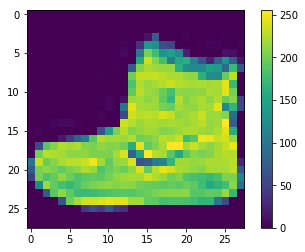

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

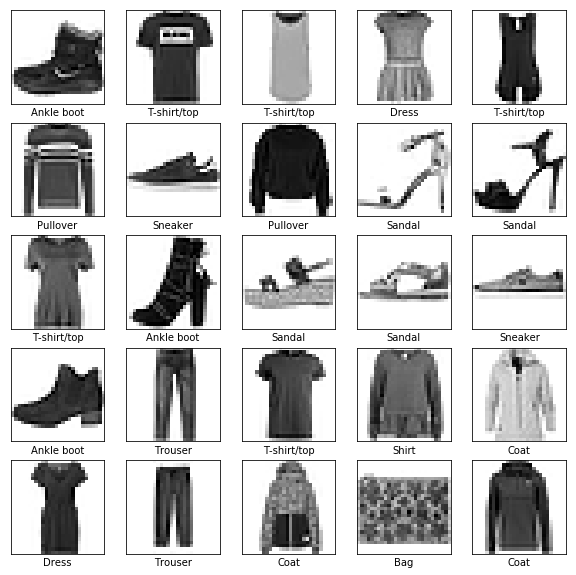

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 构建模型

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 训练模型

In [18]:
model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4939 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3762 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3390 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3146 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2969 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2832 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2687 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2603 - accuracy: 0.9029
Epoch 9/10
60000/60000 [===

#### 评估模型

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3568 - accuracy: 0.8797

Test accuracy: 0.8797


#### 使用模型进行预测

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([1.7979265e-09, 7.3289983e-09, 9.5331651e-12, 2.1585663e-12,
       7.0955425e-10, 7.8880890e-05, 6.4227542e-08, 1.1400685e-02,
       3.9492037e-10, 9.8852044e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

##### Helper Funcitons

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

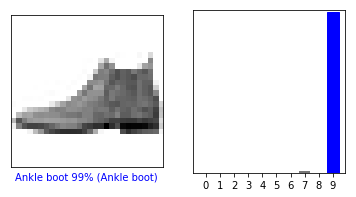

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

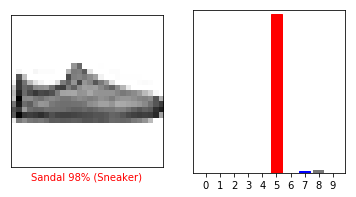

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

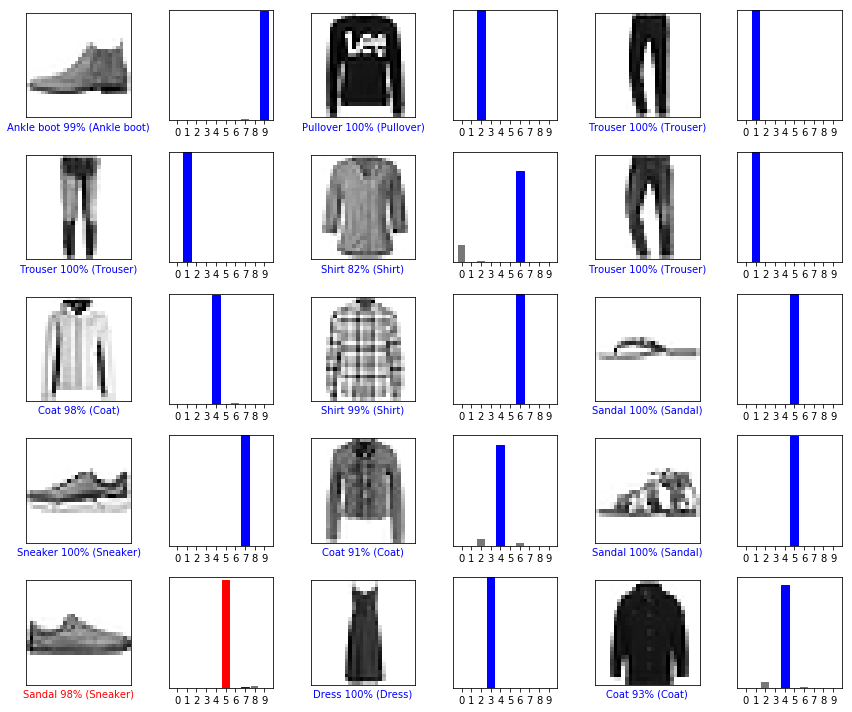

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### 在TensorBoard中查看信息

In [ ]:
# add callback 
log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(
                        log_dir=log_dir, histogram_freq=1)

In [ ]:
# train
model.fit(train_images, train_labels,
          epochs=10,
          verbose=1,
          validation_data=(test_images,test_labels),
          callbacks=[tensorboard_callback])

### 模型的相关信息

In [ ]:
print('模型层信息','\n',model.layers,'\n') # 返回模型的层信息
print('模型输入信息','\n',model.inputs,'\n') # 返回输入的信息
print('模型输出信息','\n',model.outputs,'\n')  # 模型输出相关的信息
print('模型概览','\n') 
print(model.summary(),'\n')# 作用等同于for utils.print_summary
print('模型配置信息','\n',model.get_config(),'\n') #以字典形式返回模型配置信息

## 函数模型

详见:[官方文档 Function API](https://keras.io/zh/getting-started/functional-api-guide/)

支持多输入多输出，层之间的链接更灵活，每个层都可以独立调用

![](img/multi-input.png)

### 程序示例

函数式API

```python

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 这部分返回一个张量
inputs = Input(shape=(784,))

# 层的实例是可调用的，它以张量为参数，并且返回一个张量
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# 这部分创建了一个包含输入层和三个全连接层的模型
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels)  # 开始训练

```

**定义多输入多输出模型**

```python
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])
```

## 两种模型的区别

+ Sequential模型,
    + 只有一个输入和输出，而且网络是层的线性堆叠
    + 这种模型编译速度快，操作上也比较简单
+ 基于Function API的模型（以前被称为Graph，即图模型）
    + 支持多输入多输出，层与层之间可以任意链接，所有层都是可以随意调用的
    + 编译速度慢

# 重要部件

## 损失函数的定义

更多内容详见：[官方文档](https://keras.io/zh/losses/)

>损失函数，是编译时所需的两个参数之一

```python
model.compile(loss='mean_squared_error', optimizer='sgd')
```

**常见损失函数：**
+ 分类问题：
    + 交叉熵损失/负似然对数
        + categorical_crossentropy多分类交叉熵损失:`categorical_crossentropy`
        + BinaryCrossentropy二分类交叉损失: `binary_crossentropy`
    + Hinge loss 合页损失/多分类SVM损失
    
 
+ 回归问题
    + MeanSquaredError(MSE) 均方误差/平方损失/L2损失：回归问题中最常用的损失函数 
        + 调用： `mean_squared_error(y_true,y_pred)`
        + 优点：有利于梯度下降,误差大时下降快,误差小时下降慢,有利于函数收敛
        + 缺点：受明显偏离正常范围的离群样本的影响较大
    + MeanAbsoluteError(MAE) 平均绝对误差/L1损失：想额外增强对离群样本的健壮性时使用
        + 调用：`mean_absolute_error(y_true,y_pred)`
        + 优点：克服了MSE的缺点, 受偏离正常范围的离群样本影响较小
        + 缺点：收敛速度比MSE慢,因为当误差大或小时都保持同等速度下降,而且在某一点处还不可导,计算机求导比较困难
    + Huber loss 胡伯损失：是一个带参数的损失函数,集合了MSE和MAE的优点,但是需要手动调参。降低了对离群点的惩罚程度
        + 当预测偏差小于$\delta$时,采用MSE
        + 当预测偏差大于$\delta$时,采用线性误差

      

## Metrics

更多内容详见：[官方文档](https://keras.io/zh/metrics/)

> 用于判断模型的好坏,在模型编译阶段使用

```python
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae', 'acc'])
```

常见的指标有：
+ Accuracy(简写为:'acc')
+ AUC,Precision, Recall等(这三个在keras版本更新之后已经移除,需要自己手动实现) [参考实现](https://stackoverflow.com/questions/43076609/how-to-calculate-precision-and-recall-in-keras)
+ MAE,MSE等

#### 自定义评价函数
自定义评价函数应该在编译的时候（compile）传递进去。该函数需要以 (y_true, y_pred) 作为输入参数，并返回一个张量作为输出结果。
```python
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])
```

## Optimizers

```python
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
```

更多内容详见： [官方文档](https://keras.io/zh/optimizers/)

优化器选择,keras中内置的包括：
+ SGD随机梯度下降 
```python
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
```
+ Adam 优化器 
```python
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
```
+ 还有RMSprop,Adagrad,Adadelta,Adamax等优化器


其中：
+ RMSprop优化器通常是训练循环神经网络RNN的不错选择。
+ Adagrad优化器是一种具有特定参数学习率的优化器，它根据参数在训练期间的更新频率进行自适应调整。参数接收的更新越多，更新越小。
+ Adadelta优化器是 Adagrad 的一个具有更强鲁棒性的的扩展版本
+ Adam优化器本质上是 RMSProp 与动量 momentum 的结合
+ Nadam优化器是采用 Nesterov momentum 版本的 Adam 优化器。

## [Callbacks](https://keras.io/zh/callbacks/)

> 用于模型的训练阶段（是fit()函数的一个参数）

回调函数是一个函数的合集，会在训练的阶段中所使用。你可以使用回调函数来查看训练模型的内在状态和统计。你可以传递一个列表的回调函数（作为 callbacks 关键字参数）到 Sequential 或 Model 类型的 .fit() 方法。在训练时，相应的回调函数的方法就会被在各自的阶段被调用。

常见用途:
1. **keras.callbacks.History()** keras中模型默认回调History函数，每轮训练收集损失和准确率，如果有测试集，也会收集测试集的数据。<br>
    PS:这个对象是自动启用的,不需要显示调用
```python
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, verbose=0) # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
```

2. **ModelCheckpoint** 根据需求定制何时或何种情况下需要保存模型权重<br>
    可以效果变好就保存;也可以只保存最好的模型
```python
# 效果变好就保存
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
# 只保存最好的模型 只需要将文件名改成固定的（新的好的覆盖旧的） filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10,
    callbacks=callbacks_list, verbose=0)
```
3. **EarlyStopping** 根据条件提前停止模型,可以加快训练速度,也可以在一定程度上防止过拟合 常用ModelCheckPoint联用
```python
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_loss',patience=10)
# monitor: 监控的数据  patience：能够容忍多少个epoch内都没有improvement
```

4. **LearningRateScheduler** 可以控制学习速度，取当前的轮数，返回学习速率
```python
def step_decay(epoch):
    """
    输入一个epoch序号,输出学习率
    """
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    # initial_lrate初始的速度，drop是减速频率，epochdrop是降低多少
    return lrate
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False) model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
```
5.**Tensorboard** 可视化训练结果,如果电脑上已经安装了TensorFlow,可以通过控制台启动它
```python
# 控制台启动    
tensorboard --logdir=og_dir
# 路径保持和存储的log文件路径一致,然后浏览器访问http://localhost:6006/ 即可
# 模型中调用tensorboard
from keras.callbacks import TensorBoard
og_dir = 'C:\\Users\\Lido_Lee\\Downloads\\IMDb_callback'
#加入tensorboard callback
callbacks = [TensorBoard(log_dir=log_dir, histogram_freq=1,embeddings_freq=0,embeddings_layer_names=None,),....]
```

# 扩展资料

1. [Deep Learning with Keras and Tensorflow](https://wizardforcel.gitbooks.io/deep-learning-keras-tensorflow/content/)
2. [Huber-loss](https://www.cnblogs.com/nowgood/p/Huber-Loss.html)
3. [损失函数简介](jiqizhixin.com/articles/091202)
4. [常用二分类损失函数和回归函数](http://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote10.html)
5. [keras优化器介绍](https://blog.csdn.net/u013249853/article/details/89148990)